# Single Neuron

## Example- The Linear Unit as a Model

Below is a multiple inputs single neuron:    
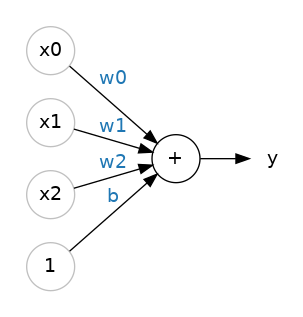<p>
The formula for this neuron would be: $$y=w_0x_0+w_1x_1+w_2x_2+b$
* $x_0, x_1, x_1$: inputs
* $w_0, w_1, w_1$：weights. Whenever a value flows through a connection, you multiply the value by the connection's **weight**. For the input **x**, what reaches the neuron is **w * x**. A neural network "learns" by modifying its **weights**.
* $b$: a special kind of weight we call the **bias**.

## Linear Units in Keras

We could define a linear model accepting three input features($x_0, x_1, x_1$)and producing a single output($y$) like below:

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

* with the first arguement **units**, we difine how many outputs we want. **It is equal to the number of neurons in a layer**. Here the output is only $y$.
* with the second arguement **input_shape**, we tell Keras the dimensions of the inputs. Here the inputs are $x_0, x_1, x_1$.

# Deep Neural Networks

## Layers

Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer.  

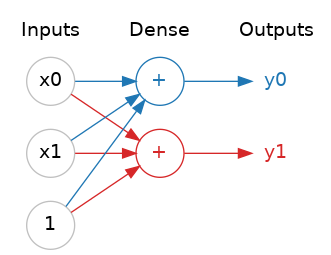

## Activation Function

An activation function is simply some function we apply to each of a layer's outputs (its activations). The most common is the rectifier function  max(0,x).  

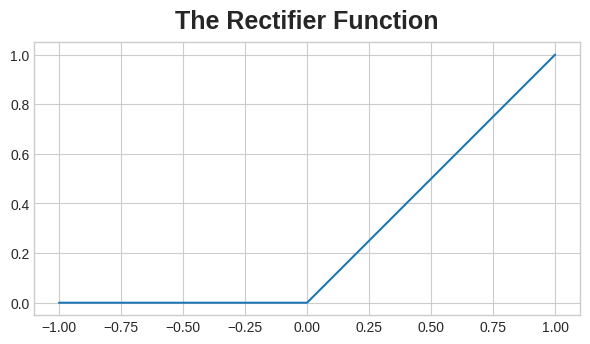  

**Without activation functions, neural networks can only learn linear relationships**. In order to fit curves, we'll need to use activation functions. The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines.  

When we attach the rectifier to a linear unit, we get a **rectified linear unit or ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".) 

## Stacking Dense Layers

<a id = "chapter_2.3"></a> 
Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.  

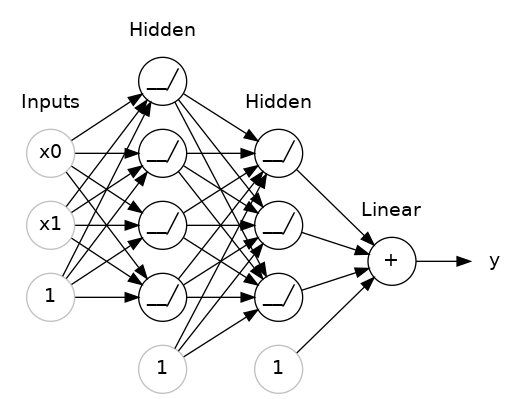 

The layers before the output layer are sometimes called **hidden**.  

Notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

## Building Sequential Models

The model below is built according to the picture in [Chapter 2.3](#chapter_2.3).

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
model = keras.Sequential([
    # the hidden ReLU layers
    # the first hidden layer
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    #the second hidden layer
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

**Be sure to pass all the layers together in a list, like [layer, layer, layer, ...].**

# Stochastic Gradient Descent

## Terminology

- Loss Function: it measures how good the network's predictions are, (e.g. MSE, MAE);  


- Optimizer: it can tell the network how to change its weights, (e.g stochastic gradient descent);
    - SGD Steps:
      1. Sample some training data (minibatch) and run it through the network to make predictions;
      2. Measure the loss between the predictions and the true values;
      3. Finally, adjust the weights in a direction that makes the loss smaller.<br> 
      <br>
    - Minibatch (batch): each iteration's sample of training data;
    - Epoch: a complete round of the training data. The number of epochs you train for is how many times the network will see each training example.  
    
- Learning Rate: A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.
      


<img src='https://i.imgur.com/rFI1tIk.gif' width='80%'>
The animation shows the linear model  being trained with SGD. 
The pale red dots depict the entire training set, while the solid red dots are the minibatches.  

Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

## Example - Adding the Loss and Optimizer

>model.compile(
>    optimizer="adam",
    loss="mae",
)

Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

### Import data

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('red-wine.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Processing
<a id = "chapter_3.2.2"></a> 

In [8]:
x = data.drop(columns='quality')
y = data['quality']
x_col_name = x.columns

##### Spliting data

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

##### Scaling data
neural networks tend to perform best when their inputs are on a common scale.

In [10]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x_col_name)

x_valid = scaler.transform(x_valid)
x_valid = pd.DataFrame(x_valid, columns=x_col_name)

### Building Model
<a id = "chapter_3.2.3"></a> 

In [11]:
model = keras.Sequential([
    # the hidden ReLU layers
    # the first hidden layer
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    #the second hidden layer
    layers.Dense(units=512, activation='relu'),
    #the third hidden layer
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [12]:
model.compile(optimizer='adam', loss='mae')
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 69ms/step - loss: 5.1100 - val_loss: 3.5934
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 2.2257 - val_loss: 1.7506
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 1.4492 - val_loss: 0.8501
Epoch 4/10
5/5 [==============================] - 0s 37ms/step - loss: 1.1627 - val_loss: 0.9063
Epoch 5/10
5/5 [==============================] - 0s 32ms/step - loss: 0.8902 - val_loss: 0.9485
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.8569 - val_loss: 0.7230
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 0.8204 - val_loss: 0.6128
Epoch 8/10
5/5 [==============================] - 0s 26ms/step - loss: 0.7432 - val_loss: 0.6215
Epoch 9/10
5/5 [==============================] - 0s 25ms/step - loss: 0.6927 - val_loss: 0.6171
Epoch 10/10
5/5 [==============================] - 0s 26ms/step - loss: 0.6944 - val_loss: 0.6544


In [13]:
model_history = pd.DataFrame(history.history)
model_history

,loss,val_loss
0,5.109963,3.593359
1,2.225713,1.750589
2,1.449162,0.850120
3,1.162735,0.906333
4,0.890246,0.948469
5,0.856874,0.722986
6,0.820369,0.612799
7,0.743244,0.621487
8,0.692687,0.617121
9,0.694361,0.654399


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Epoch', ylabel='MAE'>

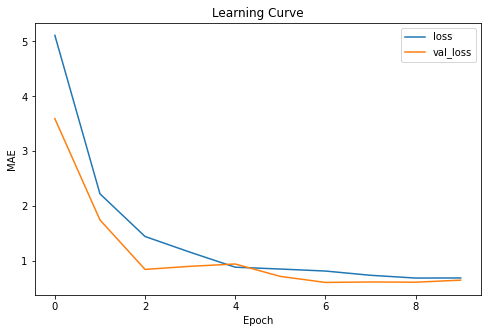

In [14]:
model_history.plot(
    figsize=(8,5), 
    title='Learning Curve',
    xlabel='Epoch',
    ylabel='MAE',
    fontsize=10
)

# Overfitting and Underfitting

## Terminology

- Signal: it can help our model make predictions from new data.  


- Noise: it is only true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions. The noise is the part might look useful but really isn't.  


- Learning Curves: plot traing loss and validation loss against epochs.the training loss will go down either when the model learns signal or when it learns noise. But the validation loss will go down only when the model learns signal.
<img src="https://i.imgur.com/tHiVFnM.png" width="50%">

- Underfitting： the model dosen't learn enough signal.   


- Overfitting the model learns too much noise.

## Ways to Decrease Overfitting and Underfitting

### Capacity

A model's capacity refers to the size and complexity of the patterns it is able to learn. For neural networks, it is determined by the how many neurons it has and how they are connected together. If your model is underfitting, you should increase the capacity.  


Methods to increase capacity:
- Winder networks: have easier time learning more linear relationship.
- Deeper networks: prefer more nonlinear relationship.

    Examples of wider and deeper networks:
```Python
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])
deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

### Early Stopping

#### Introduction

Simply stop the training whenever it seems the validation loss isn't decreasing anymore. 
<img src="https://i.imgur.com/eP0gppr.png" width="50%">

Code:
```Python
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
```
These parameters say: "If there hasn't been at least an improvement of 0.01 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found." It can sometimes be hard to tell if the validation loss is rising due to overfitting or just due to random batch variation. The parameters allow us to set some allowances around when to stop.<p>
**<font color=red size=6>how to understand EarlyStopping?</font>**


#### Example

In [15]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

Here still use the model built in [Chapter 3.2.3](#chapter_3.2.3)

##### Set EarlyStopping

In [16]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [17]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping],   # put your callbacks in a list
)

Epoch 1/100
5/5 [==============================] - 0s 40ms/step - loss: 0.6660 - val_loss: 0.5920
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.6463 - val_loss: 0.6183
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.6438 - val_loss: 0.5717
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6286 - val_loss: 0.6041
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6194 - val_loss: 0.5636
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.6150 - val_loss: 0.5693
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6066 - val_loss: 0.5624
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.5931 - val_loss: 0.5508
Epoch 9/100
5/5 [==============================] - 0s 31ms/step - loss: 0.5906 - val_loss: 0.5945
Epoch 10/100
5/5 [==============================] - 0s 30ms/step - loss: 0.5895 - val_loss: 0.5498
Epoch 11/100
5/5 [=

Minimun validation loss: 0.472
Epoch number: 52


Text(52, 0.472, '(52,0.472)')

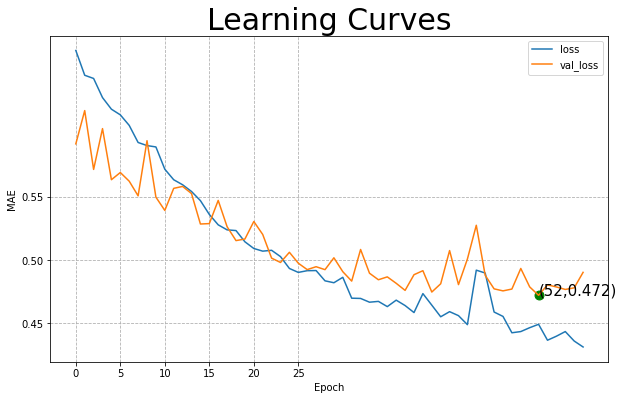

In [18]:
model_history = pd.DataFrame(history.history)

val_loss_min = model_history.val_loss.min()
epoch_min = model_history[model_history.val_loss == val_loss_min].index
val_loss_min = round(val_loss_min, 4)
epoch_min = np.array(epoch_min)[0]
print('Minimun validation loss: {}'.format(val_loss_min))
print('Epoch number: {}'.format(epoch_min))

_,ax1 = plt.subplots()
model_history.plot(
    figsize=(10,6), 
    xlabel='Epoch',
    ylabel='MAE',
    fontsize=10,
    ax=ax1,
    xticks=np.arange(0, 26, 5),
    yticks=np.arange(0, 0.6, 0.05)
)
ax1.set_title('Learning Curves', size=30)
ax1.scatter(epoch_min, val_loss_min, color='green',s=80)
ax1.grid(linestyle='--')
ax1.text(epoch_min, val_loss_min, '({},{})'.format(epoch_min, val_loss_min),size=15)


It shows that the Keras stopped training before the full 100 epochs.

# Dropout and Batch Normalization

## Dropout

Randomly drop out some fraction of a layer's input units **every step of training**, making it much harder for the network to learn those spurious patterns in the **training data**. <p>
You could also think about dropout as creating a kind of ensemble of networks. The predictions will no longer be made by one big network, but instead by **a committee of smaller networks**. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual. (If you're familiar with **random forests** as an ensemble of decision trees, it's the same idea.)<p>
Below picture shows 50% dropout has been added between the two hidden layers.
<img src="https://i.imgur.com/a86utxY.gif" width='80%'>

    
Code:<p>
```Python
keras.Sequential([
    # ...
    # Put the Dropout layer just before the layer you want the dropout applied to
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer 
    layers.Dense(16),
    # ...
])
```

## Batch Normalization (Batchnorm)

Batchnorm can help correct training that is slow or unstable.The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.<p>
A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.<p>
it's good to normalize the data before it goes into the network:
```Python
layers.BatchNormalization(),
layers.Dense(16, activation='relu'),
keras.Sequential([
    # first layer
    layers.BatchNormalization(), # act as a kind of adaptive preprocessor 
    layers.Dense(16),
    # ...
])
```

Most often, batchnorm is added as an aid to the optimization process (though it can sometimes also help prediction performance). Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck". Consider adding batch normalization to your models, especially if you're having trouble during training.<p>
It seems that batch normalization can be used at almost any point in a network. You can put it after a layer...
```Python
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
 ```
... or between a layer and its activation function:
```Python
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```
**<font color=red size=6>What is the influence by adding batchnorm between different layers?</font>**


## Example - Using Dropout and Batch Normalization

Here still use the dataset processed in [Chapter 3.2.3](#chapter_3.2.2)

In [19]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [20]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

Minimun validation loss: 0.4985
Epoch number: 99


Text(99, 0.4985, '(99,0.4985)')

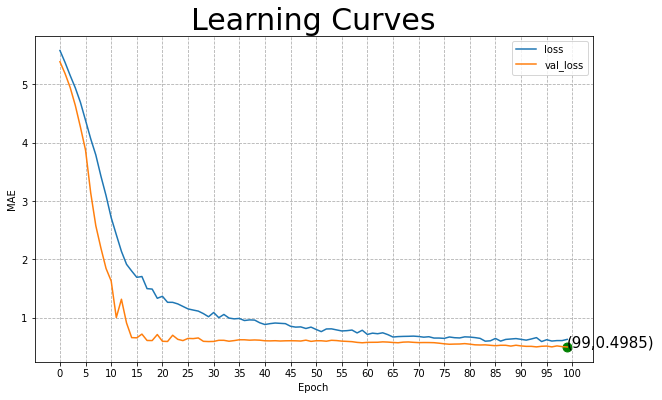

In [21]:
model_history = pd.DataFrame(history.history)

val_loss_min = model_history.val_loss.min()
epoch_min = model_history[model_history.val_loss == val_loss_min].index
val_loss_min = round(val_loss_min, 4)
epoch_min = np.array(epoch_min)[0]
print('Minimun validation loss: {}'.format(val_loss_min))
print('Epoch number: {}'.format(epoch_min))

_,ax2 = plt.subplots()
model_history.plot(
    figsize=(10,6), 
    xlabel='Epoch',
    ylabel='MAE',
    fontsize=10,
    ax=ax2,
    xticks=np.arange(0, 105, 5),
)

ax2.set_title('Learning Curves', size=30)
ax2.scatter(epoch_min, val_loss_min, color='green',s=80)
ax2.grid(linestyle='--')
ax2.text(epoch_min, val_loss_min, '({},{})'.format(epoch_min, val_loss_min),size=15)


# Binary Classification

## Terminology

- Accuracy: $accuracy = number_{correct} ~/~ total$
- Binary Cross-Entropy: $H_p(q) = - \frac{1}{N}\Sigma y_i \cdot log(p(y_i)) + (1-y_i)\cdot log(1-p(y_i)) $
  - $y_i$: 1 for positive, 0 for negative;
  -$p(y_i)$: the predicted probability.
<img src="https://i.imgur.com/DwVV9bR.png" width="50%">
- Sigmoid Activation: $\sigma (x) = \frac{1}{1+e^{-x}}$ , it maps real numbers into the interval [0,1].<img src='https://i.imgur.com/FYbRvJo.png' width='48%'>

## Example - Binary Classification

### Import data

In [22]:
data = pd.read_csv('ion.csv', index_col=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


### Data precessing

##### change the class column into numbers

In [23]:
data.Class.replace(to_replace=['good', 'bad'], value=[1,0], inplace=True)

##### Split   data

In [24]:
x = data.drop(columns='Class')
y = data.Class
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

#####  Scale data

In [25]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_valid = pd.DataFrame(scaler.transform(x_valid))

### Build Model

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model  = keras.Sequential([
    layers.Dense(4, 'relu', [33]),
    layers.Dense(4, 'relu'),
    # the final layer we use sigmoid activation function
    layers.Dense(1, 'sigmoid')
])

In [28]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [29]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

In [30]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

In [31]:
model_history = pd.DataFrame(history.history)
model_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.630497,0.665306,0.670046,0.584906
1,0.629550,0.665306,0.669921,0.584906
2,0.628626,0.665306,0.669787,0.584906
3,0.627724,0.665306,0.669642,0.584906
4,0.626852,0.665306,0.669485,0.584906


<AxesSubplot:>

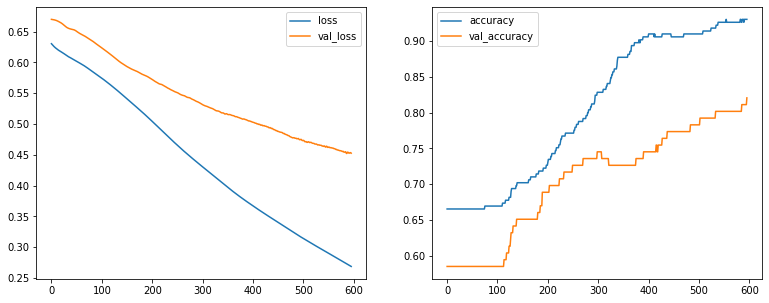

In [32]:
_, ax = plt.subplots(1,2, figsize=(13, 5))
model_history[['loss', 'val_loss']].plot(ax=ax[0])
model_history[['accuracy', 'val_accuracy']].plot(ax=ax[1])